<h1>Family Income and Expenditures</h1>
<p>Analyst : Concha, Vaughn Allystair</p>
<p>Analyst : Sinaon, Gail Ivan</p>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [2]:
fam = pd.read_csv('datasets//Family Income and Expenditure.csv')

In [3]:
fam

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
fam.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [5]:
fam.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [6]:
fam.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [7]:
regions = fam['Region'].value_counts()
regions

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64

In [8]:
region_income_expenditure = fam.groupby(fam['Region'].str.strip())[["Total Household Income", "Total Food Expenditure"]].mean().sort_values(by="Total Household Income", ascending=False).round(2)

In [9]:
region_income_expenditure

,Total Household Income,Total Food Expenditure
Region,,
NCR,420861.86,127080.46
IVA - CALABARZON,303360.54,105333.95
III - Central Luzon,292965.18,99726.70
CAR,269540.48,80352.78
XI - Davao Region,238115.89,81126.93
I - Ilocos Region,238110.08,80649.94
II - Cagayan Valley,236778.22,75604.36
VII - Central Visayas,234909.31,84307.18
VI - Western Visayas,220481.26,79829.03


<h1>Insight 1</h1>
<ul>
    <li>
        Households in the National Capital Region (NCR) have the highest average income and also spend the most on food, indicating a strong correlation between regional economic development and household spending power. 
    </li>
</ul>

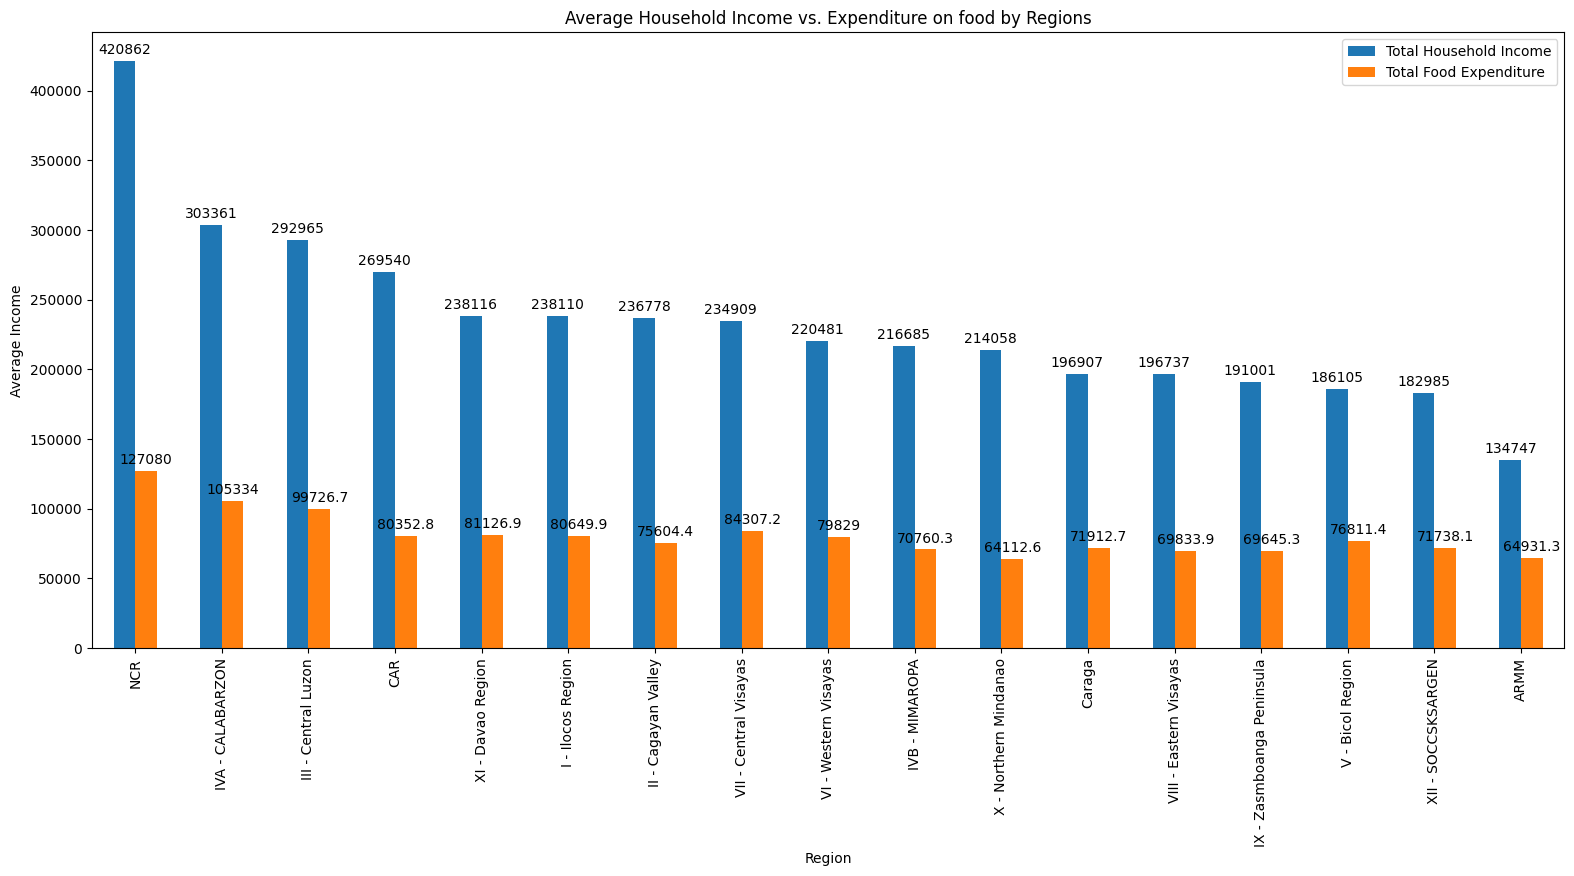

In [10]:
bar1 = region_income_expenditure
ax = bar1.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Average Household Income vs. Expenditure on food by Regions')
plt.ylabel("Average Income")
plt.show()

<h1>Insight 2</h1>
<ul>
    <li>
        Households earning from wage/salary jobs have the highest average income and largest representation, suggesting formal employment as a key driver of economic stability.
    </li>
</ul>

In [11]:
source_of_income = fam.groupby("Main Source of Income")["Total Household Income"].agg(["count", "min", "mean"]).round(2)
source_of_income

,count,min,mean
Main Source of Income,,,
Enterpreneurial Activities,10320,12911,213484.38
Other sources of Income,10836,11285,242638.83
Wage/Salaries,20388,18004,267414.95


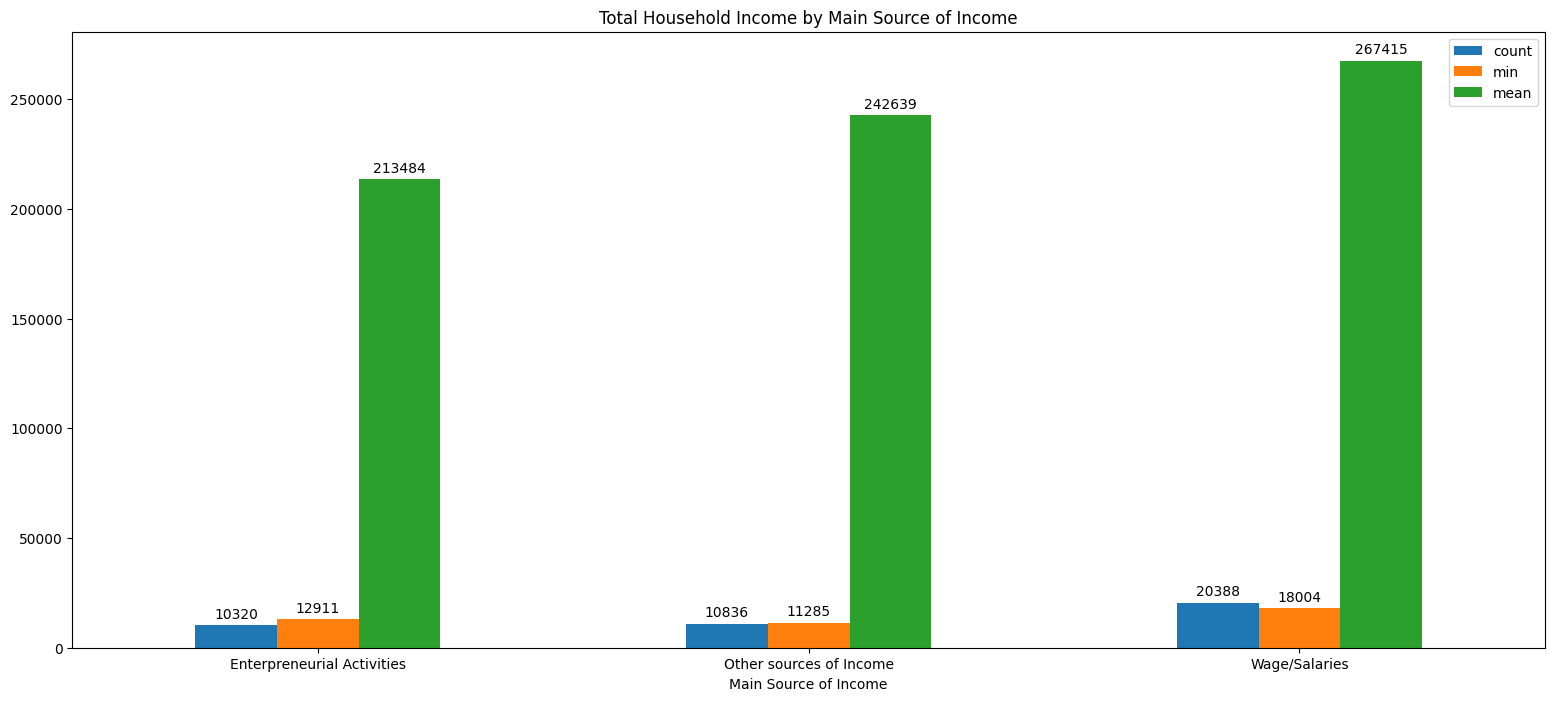

In [12]:
bar2 = source_of_income
ax = bar2.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Total Household Income by Main Source of Income')
plt.xticks(rotation=0)
plt.show()

<h1>Insight 3</h1>

In [13]:
agri_counts = fam["Agricultural Household indicator"].value_counts(normalize=True) * 100
agri_counts.round(2)

Agricultural Household indicator
0    67.65
1    21.71
2    10.64
Name: proportion, dtype: float64

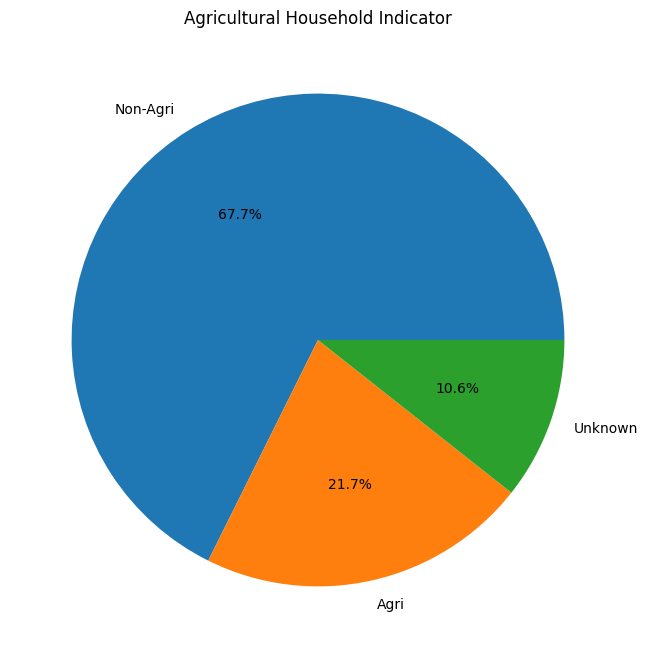

In [14]:
agri_counts.plot.pie(labels=["Non-Agri", "Agri", "Unknown"], autopct='%1.1f%%')
plt.title("Agricultural Household Indicator")
plt.gcf().set_size_inches(12, 8)
plt.ylabel("")
plt.show()

<h1>Insight 4</h1>
<ul>
    <li>
        Households allocate the largest portion of their food budget to Bread and Cereals, with an average expenditure of ₱25,133.72. This is significantly higher than other food categories, highlighting the cultural and dietary importance of rice in the region.
    </li>
</ul>

In [15]:
fam.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [16]:
food_items = [
    "Total Rice Expenditure", "Bread and Cereals Expenditure", "Meat Expenditure",
    "Total Fish and  marine products Expenditure", "Vegetables Expenditure", "Fruit Expenditure"
]
foods = fam[food_items].mean().sort_values(ascending=False).head(5).round(2)
foods

Bread and Cereals Expenditure                  25133.72
Total Rice Expenditure                         18195.83
Meat Expenditure                               10540.07
Total Fish and  marine products Expenditure    10529.32
Vegetables Expenditure                          5006.92
dtype: float64

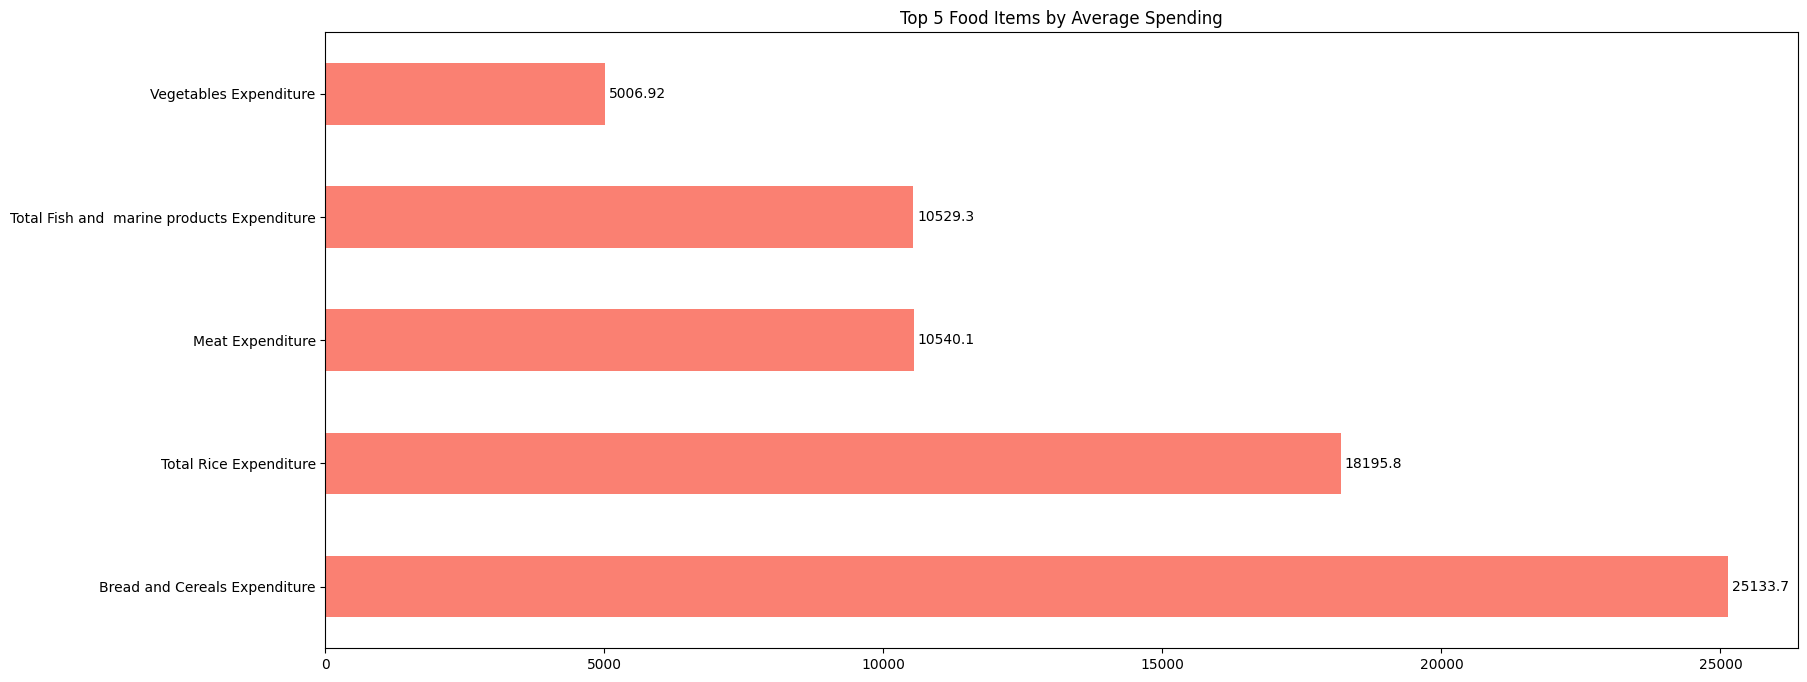

In [17]:
bar4 = foods
ax = bar4.plot(kind='barh', color='salmon')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Top 5 Food Items by Average Spending')
plt.ylabel("")
plt.show()

<h1>Insight 5</h1>
<ul>
    <li>
        Households allocate the majority of their budget to food (about two-thirds), while education and medical care receive smaller but significant shares. 
    </li>
</ul>

In [18]:
fam.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [19]:
spending = fam[["Total Food Expenditure", "Medical Care Expenditure", "Education Expenditure"]].mean()
spending

Total Food Expenditure      85099.158194
Medical Care Expenditure     7160.230936
Education Expenditure        7473.500481
dtype: float64

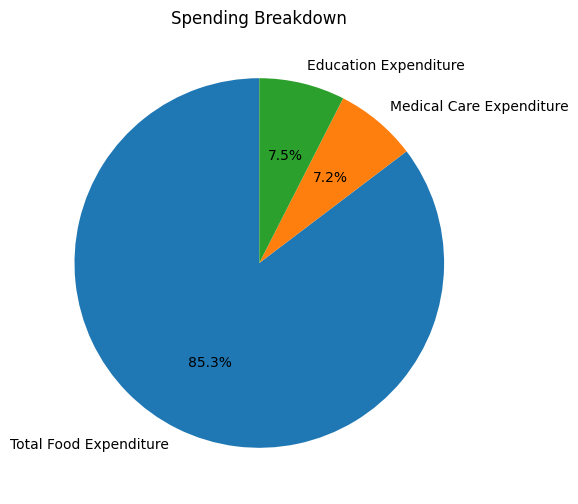

In [20]:
spending.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title("Spending Breakdown")
plt.ylabel("")
plt.show()

<ul>
    <li>
        This one is by region
    </li>
</ul>

In [21]:
regional_spending = fam.groupby("Region")[["Medical Care Expenditure", "Education Expenditure"]].mean()
regional_spending.round(1)

,Medical Care Expenditure,Education Expenditure
Region,,
ARMM,868.8,4009.2
CAR,9164.5,10560.5
Caraga,4519.7,6492.3
I - Ilocos Region,7722.5,5780.4
II - Cagayan Valley,5908.8,5867.2
III - Central Luzon,10135.7,8486.3
IVA - CALABARZON,10735.0,10028.4
IVB - MIMAROPA,5141.5,6736.5
IX - Zasmboanga Peninsula,4165.7,4458.3


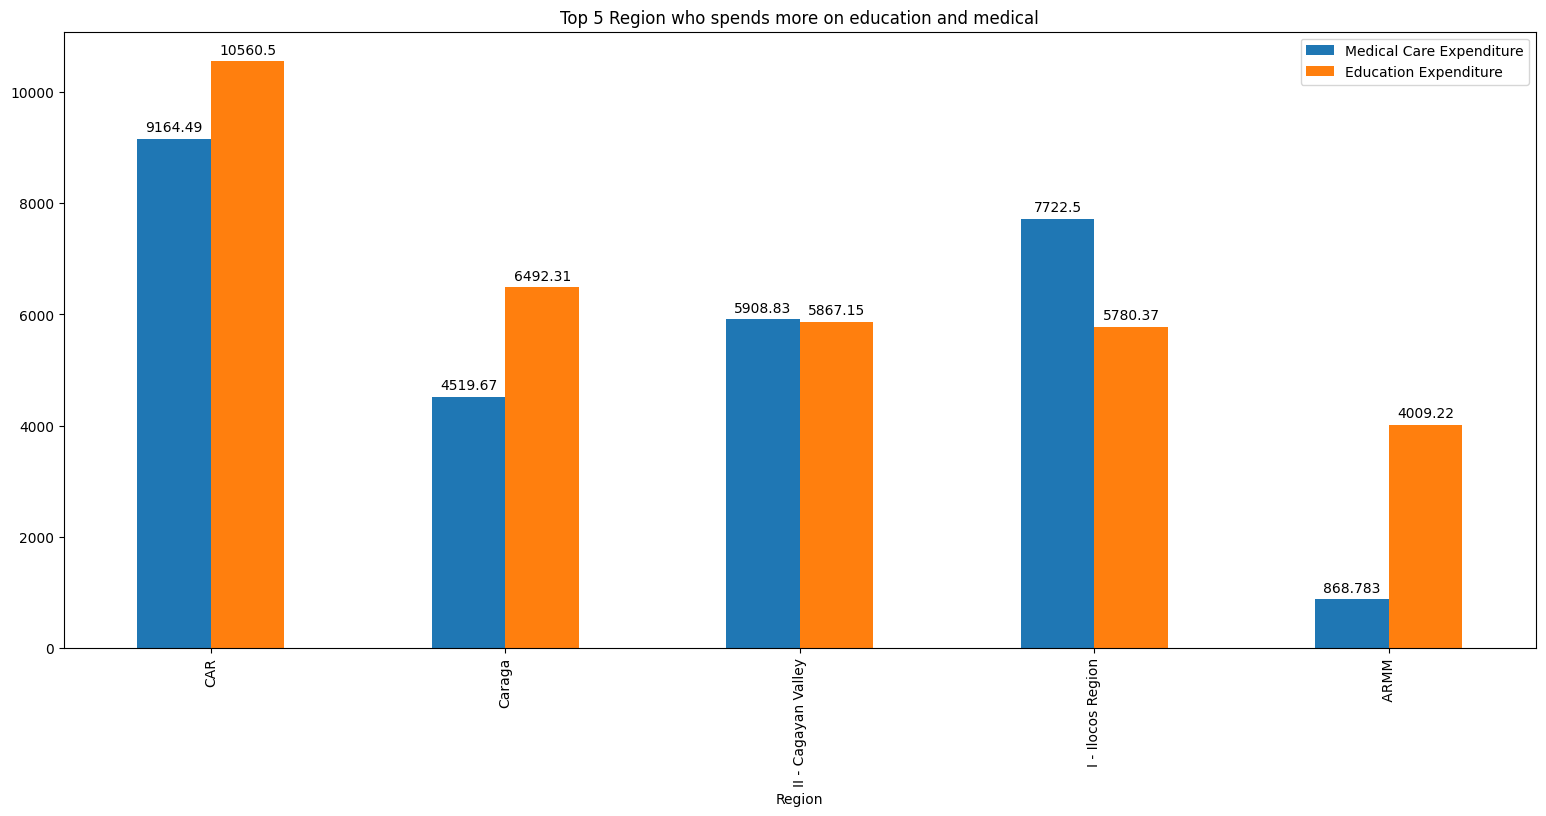

In [22]:
bar5 = regional_spending.head(5).sort_values(by="Education Expenditure", ascending=False)
ax = bar5.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Top 5 Region who spends more on education and medical')
plt.ylabel("")
plt.show()

<h1>Insight 6</h1>
<ul>
    <li>
        Higher-educated household heads tend to invest more in education.
    </li>
</ul>

In [23]:
edu_grouped = fam.groupby('Household Head Highest Grade Completed')['Education Expenditure'].mean().reset_index().sort_values(by="Education Expenditure", ascending=False)
edu_grouped

,Household Head Highest Grade Completed,Education Expenditure
24,Law Programs,49884.871795
30,Other Programs of Education at the Third Level...,43866.444444
1,Architecture and Building Programs,37822.090909
23,Journalism and Information Programs,36717.258065
33,Post Baccalaureate,33975.769231
25,Life Sciences Programs,27576.315789
40,Social and Behavioral Science Programs,27347.439394
7,Engineering and Engineering Trades Programs,26959.920206
31,Personal Services Programs,26548.842697
20,Health Programs,25100.637168


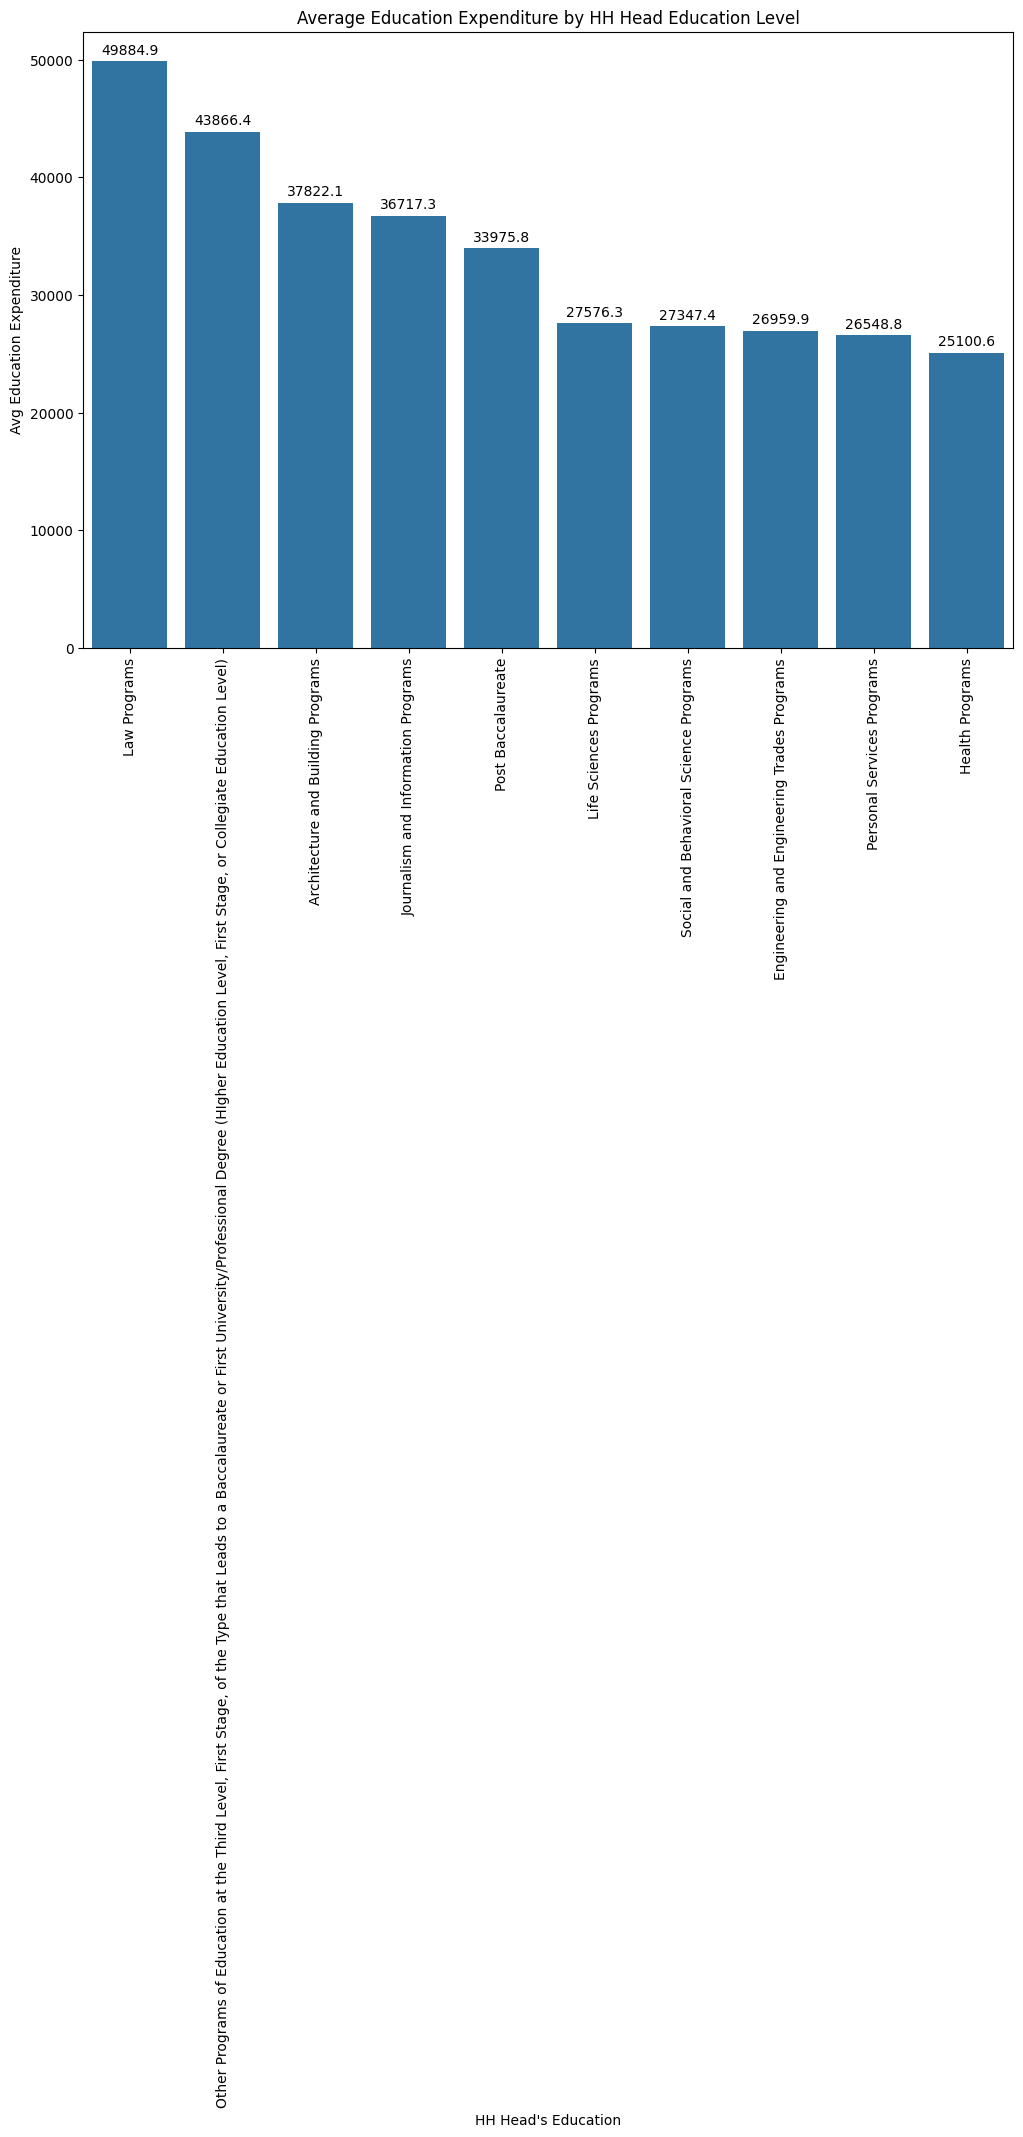

In [24]:
ax = sns.barplot(data=edu_grouped.head(10), x='Household Head Highest Grade Completed', y='Education Expenditure')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Education Expenditure by HH Head Education Level')

plt.xticks(rotation=90)
plt.gcf().set_size_inches(12, 8)
plt.ylabel('Avg Education Expenditure')
plt.xlabel("HH Head's Education")
plt.show()

<h1>Insight 7</h1>
<ul>
    <li>
        Households that own televisions are also likely to own refrigerators, indicating a general trend toward owning basic household appliances. 
    </li>
    <li>
        Households that own washing machines are more likely to own other appliances like refrigerators and air conditioners, reflecting a pattern of investing in multiple home utilities. 
    </li>
    <li>
        Households with personal computers are more likely to own air conditioners, suggesting a link between technology adoption and comfort-oriented investments. 
    </li>
</ul>

In [25]:
appliances = ['Number of Television', 'Number of Refrigerator/Freezer',
              'Number of Washing Machine', 'Number of Airconditioner',
              'Number of Personal Computer']

corr = fam[appliances].corr()

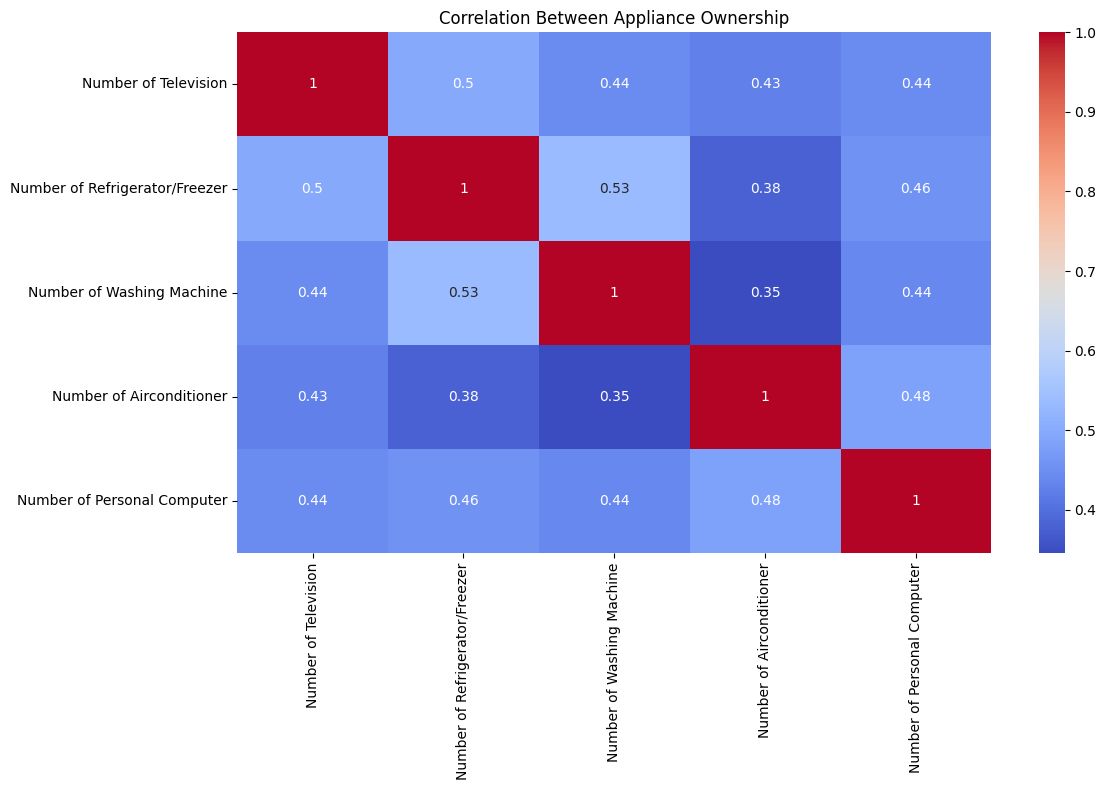

In [26]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Appliance Ownership')
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

<h1>Insight 8</h1>
<ul>
    <li>
        Larger households generally have higher total income but also significantly higher food expenditures. However, per capita income may decrease as family size increases.
    </li>
</ul>

In [46]:
# Group by family size and compute average total expenditure
spending_by_size = fam.groupby('Total Number of Family members')[['Total Household Income', 'Total Food Expenditure']].mean().round()
spending_by_size

,Total Household Income,Total Food Expenditure
Total Number of Family members,,
1,131813.0,36181.0
2,187523.0,54436.0
3,233301.0,72937.0
4,254218.0,85459.0
5,265023.0,92568.0
6,261770.0,97593.0
7,286940.0,106615.0
8,279562.0,107555.0
9,324731.0,121913.0


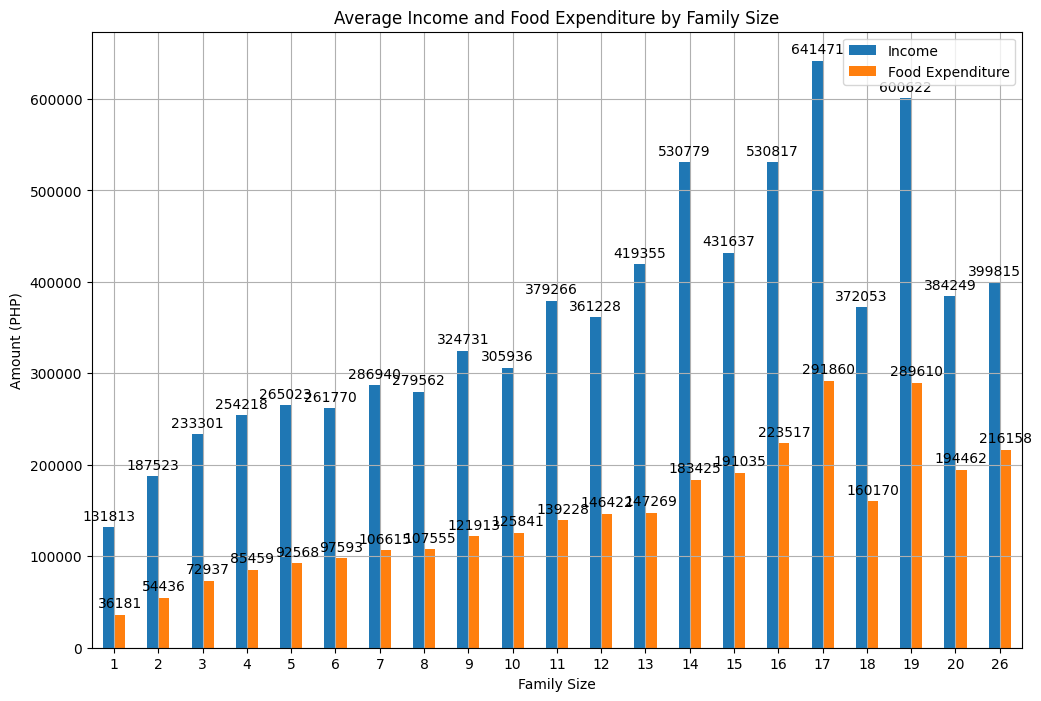

In [47]:
ax = spending_by_size.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Income and Food Expenditure by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Amount (PHP)')
plt.legend(['Income', 'Food Expenditure'])
plt.xticks(rotation=0)
plt.grid(True)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>Insight 9</h1>
<ul>
    <li>
        More durable or modern housing types (e.g., concrete houses) are associated with higher household incomes and newer constructions, indicating better living standards.
    </li>
</ul>

In [29]:
# Group by house type and calculate average income and house age
house_income = fam.groupby('Type of Building/House')[['Total Household Income', 'House Age']].mean().sort_values(by='Total Household Income', ascending=False).round(2)
house_income

,Total Household Income,House Age
Type of Building/House,,
Multi-unit residential,346994.47,24.57
Commercial/industrial/agricultural building,337213.98,27.76
Duplex,298840.44,24.37
Single house,242637.62,19.84
Institutional living quarter,234019.67,25.44
"Other building unit (e.g. cave, boat)",218683.00,30.00


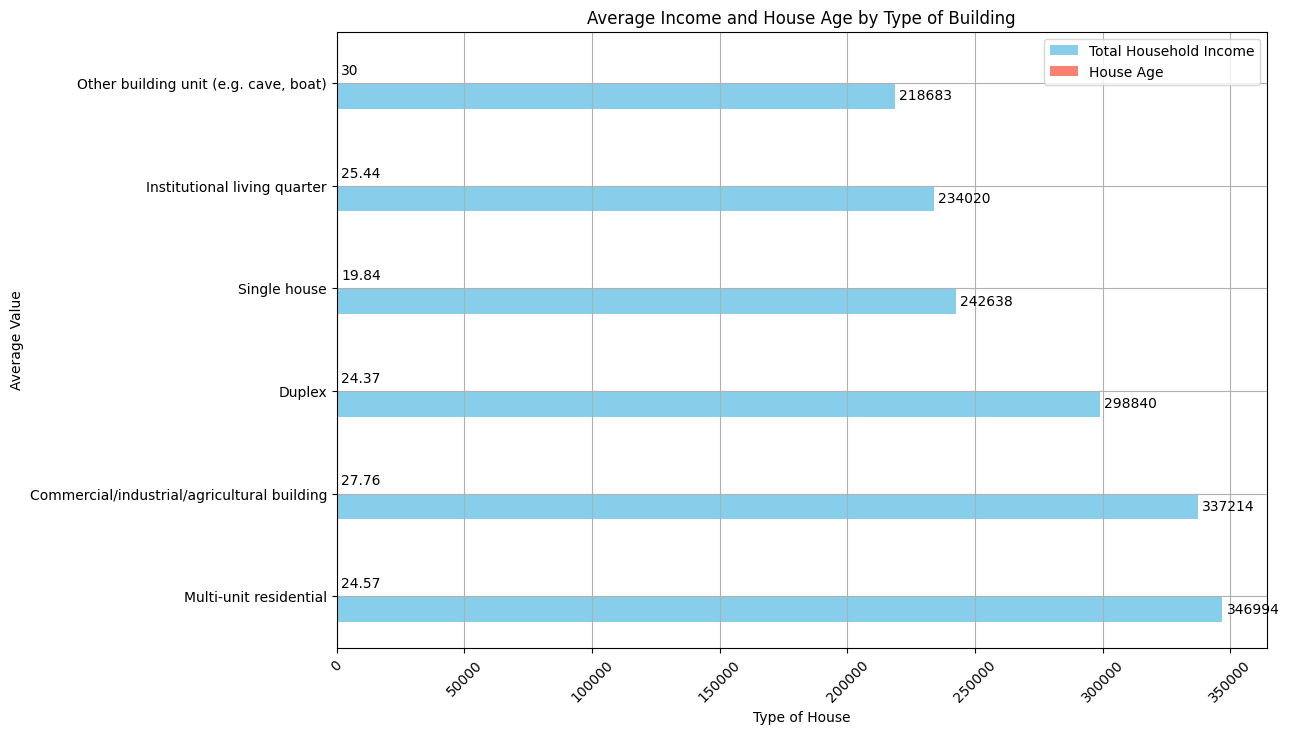

In [45]:
ax = house_income.plot(kind='barh', color=['skyblue', 'salmon'])

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Income and House Age by Type of Building')
plt.xlabel('Type of House')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>Insight 10</h1>
<ul>
    <li>
        Household heads in professional or managerial roles tend to spend more on education, possibly due to higher income and value placed on education.
    </li>
</ul>

In [31]:
# Group by occupation and calculate average education expenditure
edu_by_occupation = fam.groupby('Household Head Occupation')['Education Expenditure'].mean().sort_values(ascending=False).head(8)
edu_by_occupation

Household Head Occupation
Glass and ceramics kiln and related machine operators          114800.000000
Dentists                                                        98595.750000
Government tax and excise officials                             94466.000000
Geodetic engineers and related professionals                    84950.000000
Lawyers                                                         82250.000000
Other administrative associate professionals                    76986.421053
Production and operations managers in manufacturing             68175.727273
Production and operations managers in restaurant and hotels     62421.250000
Name: Education Expenditure, dtype: float64

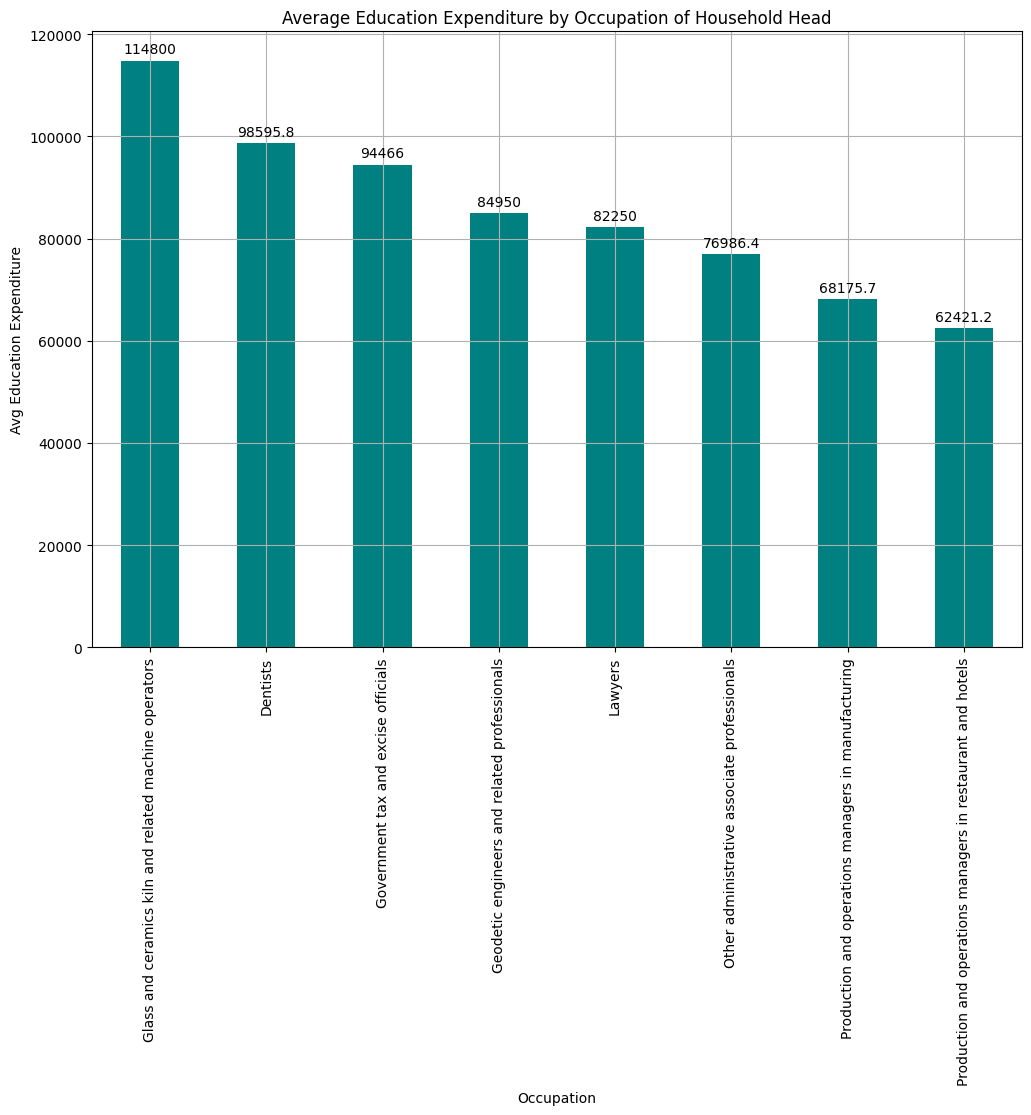

In [32]:
ax = edu_by_occupation.plot(kind='bar', figsize=(12,6), color='teal')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Education Expenditure by Occupation of Household Head')
plt.xlabel('Occupation')
plt.ylabel('Avg Education Expenditure')
plt.xticks(rotation=90)
plt.grid(True)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>
    Insight 11
</h1>
<ul>
    <li>
        Households earning from wage/salaries tend to spend more on dining out and hospitality services, suggesting greater disposable income or different spending habits.
    </li>
</ul>

In [33]:
# Group by income source and compute average restaurant expenditure
restaurant_by_income_source = fam.groupby('Main Source of Income')['Restaurant and hotels Expenditure'].mean().sort_values(ascending=False).head(5).reset_index()
restaurant_by_income_source

,Main Source of Income,Restaurant and hotels Expenditure
0,Wage/Salaries,19937.337061
1,Other sources of Income,11859.611296
2,Enterpreneurial Activities,10300.729167


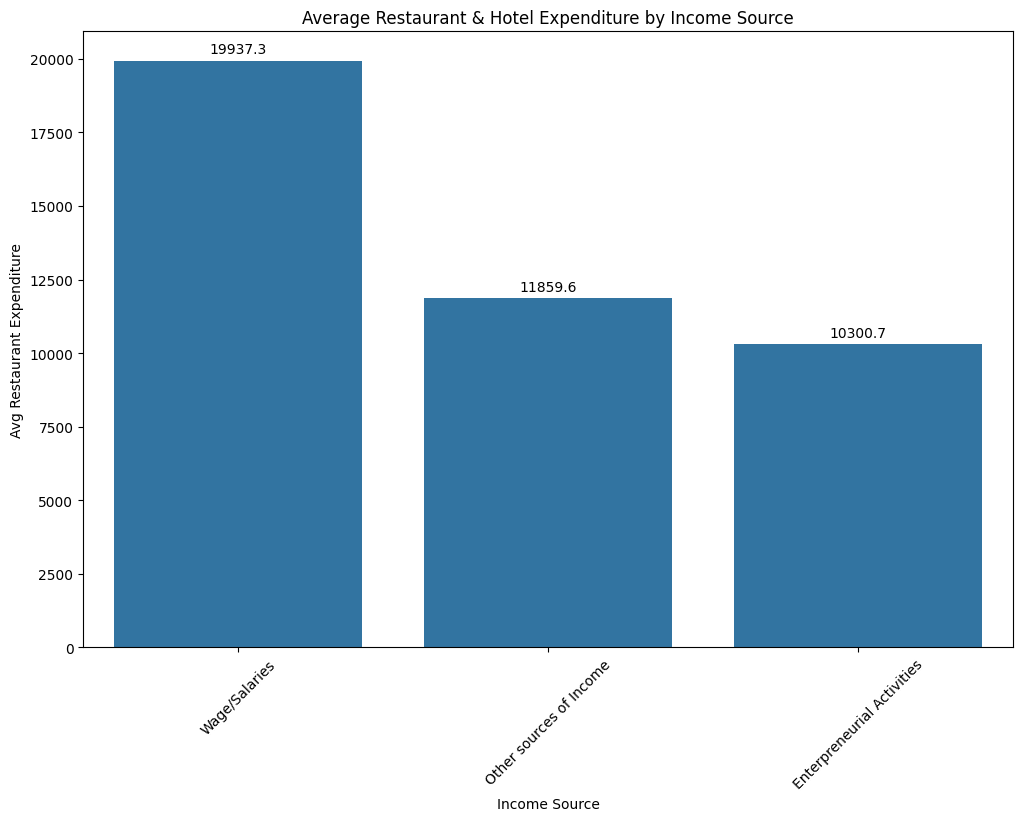

In [34]:
ax = sns.barplot(data=restaurant_by_income_source, x='Main Source of Income', y='Restaurant and hotels Expenditure')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Restaurant & Hotel Expenditure by Income Source')
plt.xticks(rotation=45)
plt.ylabel('Avg Restaurant Expenditure')
plt.xlabel('Income Source')
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>Insight 12</h1>
<ul>
    <li>
        Total food expenditure increases with family size, but per capita food spending decreases — possibly due to economies of scale or tighter budgets.
    </li>
</ul>

In [35]:
# Compute per capita food expenditure
fam['Per_Capita_Food_Expenditure'] = fam['Total Food Expenditure'] / fam['Total Number of Family members']

# Group by family size
family_size_food = fam.groupby('Total Number of Family members')[['Total Food Expenditure', 'Per_Capita_Food_Expenditure']].mean().round(2).reset_index()

family_size_food

,Total Number of Family members,Total Food Expenditure,Per_Capita_Food_Expenditure
0,1,36181.27,36181.27
1,2,54436.33,27218.17
2,3,72936.72,24312.24
3,4,85459.09,21364.77
4,5,92567.80,18513.56
5,6,97592.61,16265.44
6,7,106615.26,15230.75
7,8,107555.12,13444.39
8,9,121912.73,13545.86
9,10,125841.07,12584.11


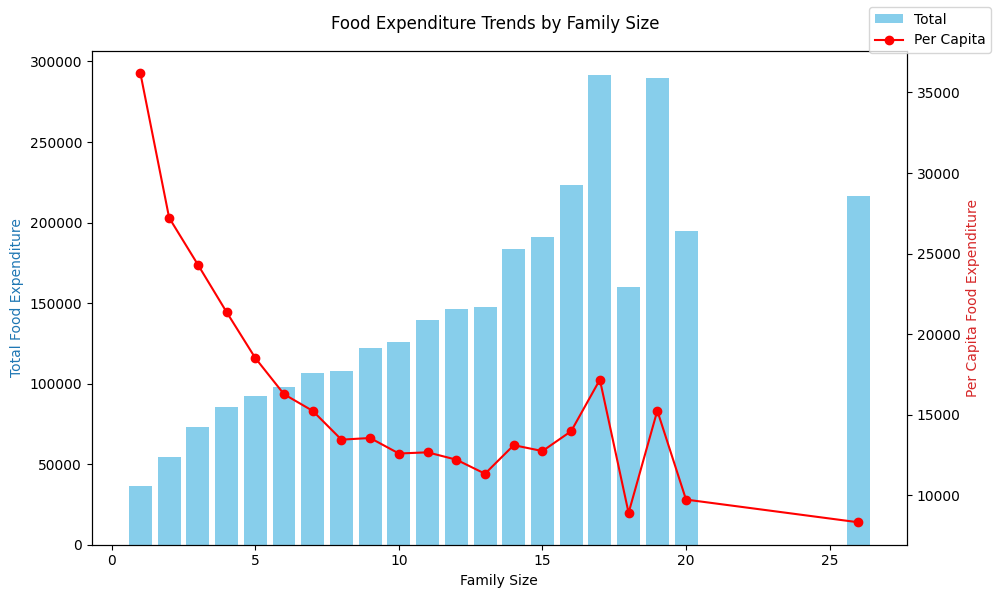

In [36]:
# Plot total vs per capita
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Family Size')
ax1.set_ylabel('Total Food Expenditure', color='tab:blue')
ax1.bar(family_size_food['Total Number of Family members'], family_size_food['Total Food Expenditure'], color='skyblue', label='Total')

ax2 = ax1.twinx()
ax2.set_ylabel('Per Capita Food Expenditure', color='tab:red')
ax2.plot(family_size_food['Total Number of Family members'], family_size_food['Per_Capita_Food_Expenditure'], color='red', marker='o', label='Per Capita')

# for x in ax.containers:
#     ax1.bar_label(x, padding=3)

fig.suptitle('Food Expenditure Trends by Family Size')
fig.legend(loc='upper right')
plt.tight_layout()
plt.show()

<h1>Insight 13</h1>
<ul>
    <li>
        Households with more children aged 5–17 years old show significantly higher education expenditures, indicating a direct relationship between school-age dependents and household budget allocation.
    </li>
</ul>

In [37]:
# Group by number of school-age children and calculate average education expenditure
education_by_children = fam.groupby('Members with age 5 - 17 years old')['Education Expenditure'].mean().reset_index()
education_by_children


,Members with age 5 - 17 years old,Education Expenditure
0,0,5131.276044
1,1,9418.695644
2,2,9451.680927
3,3,8157.465986
4,4,6236.015335
5,5,5721.879464
6,6,6208.106918
7,7,4628.187500
8,8,7359.150000


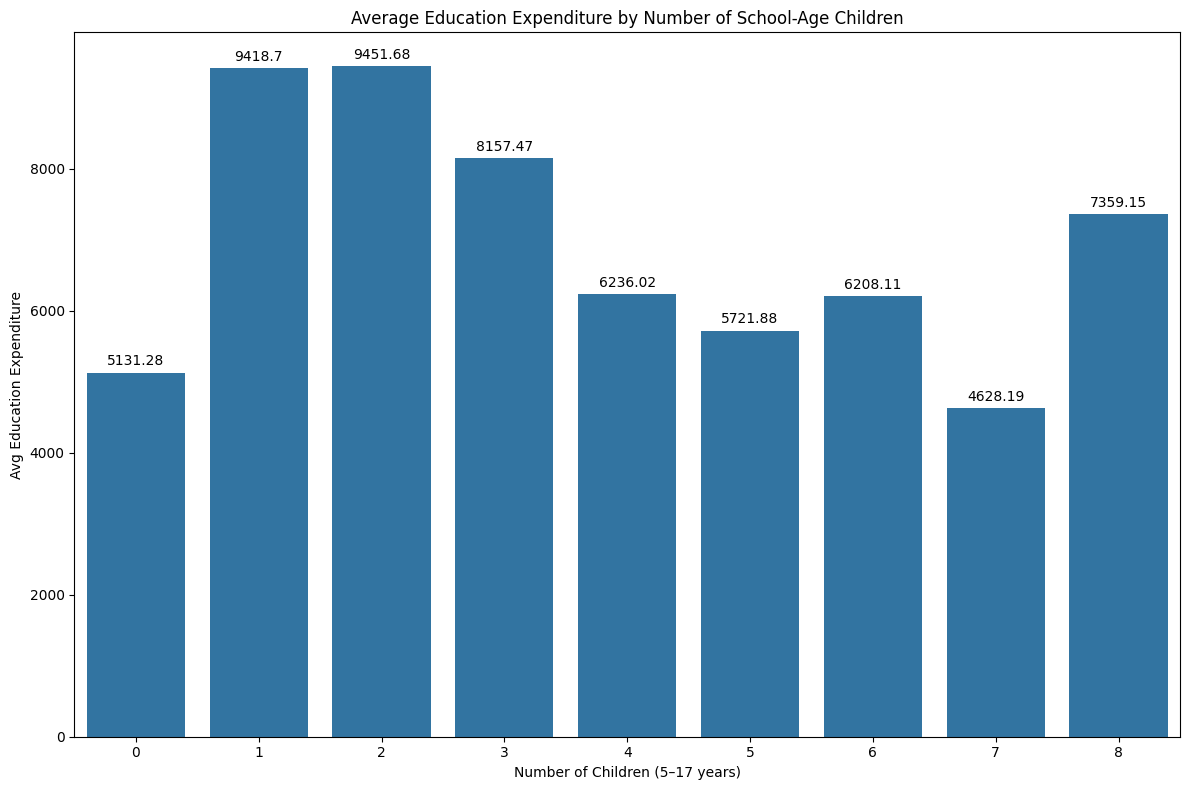

In [38]:
ax = sns.barplot(data=education_by_children, x='Members with age 5 - 17 years old', y='Education Expenditure')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Education Expenditure by Number of School-Age Children')
plt.xlabel('Number of Children (5–17 years)')
plt.ylabel('Avg Education Expenditure')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

<h1>Insight 14</h1>
<ul>
    <li>
        Majority of households rely on public water systems or community sources rather than private wells or other water sources. 
    </li>
</ul>

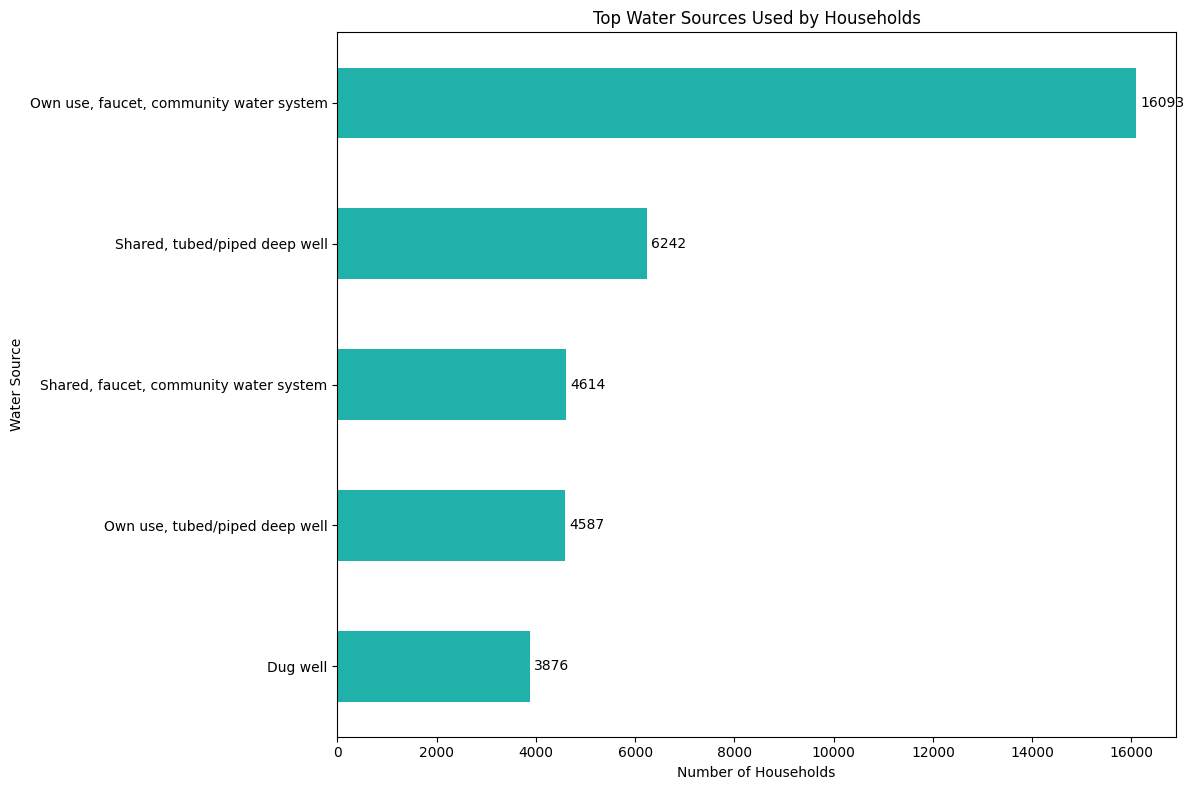

In [73]:
water_counts = fam['Main Source of Water Supply'].value_counts().head(5)

ax = water_counts.plot(kind='barh', color='lightseagreen')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Top Water Sources Used by Households')
plt.xlabel('Number of Households')
plt.ylabel('Water Source')
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

<h1>Insight 15</h1>
<ul>
    <li>
        More than half of the households do not own a car, jeep, van, or motorcycle — indicating limited personal transportation access. 
    </li>
</ul>

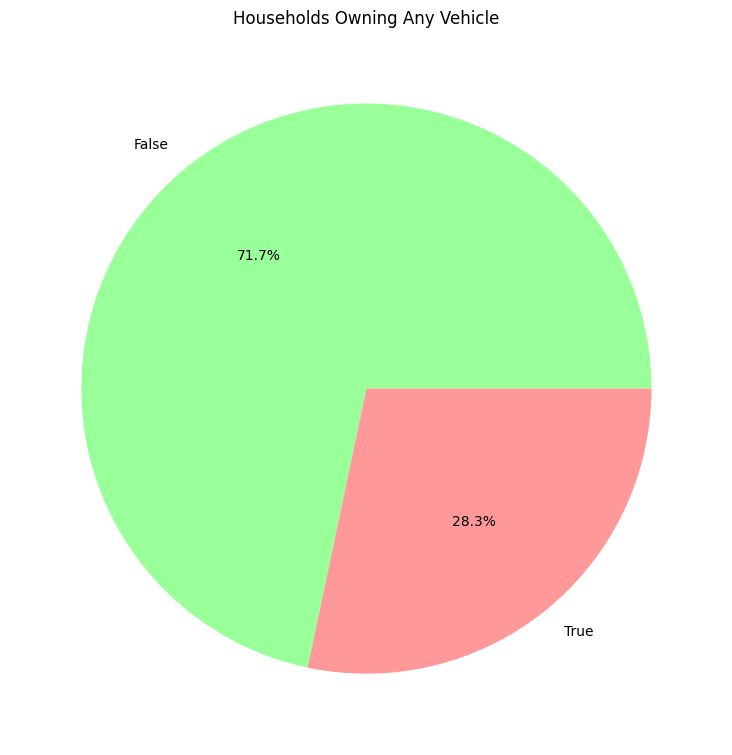

In [74]:
# Create a new column that checks if household owns any vehicle
fam['Owns_Vehicle'] = (fam['Number of Car, Jeep, Van'] + fam['Number of Motorcycle/Tricycle']) > 0

# Count and plot
fam['Owns_Vehicle'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#99FF99','#FF9999'])
plt.title('Households Owning Any Vehicle')
plt.ylabel('')
plt.tight_layout()
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>
    Insight 16
</h1>
<ul>
    <li>
        Cellular Phones are found in nearly all households, more than any other devices like televisions or air conditioners. 
    </li>
</ul>

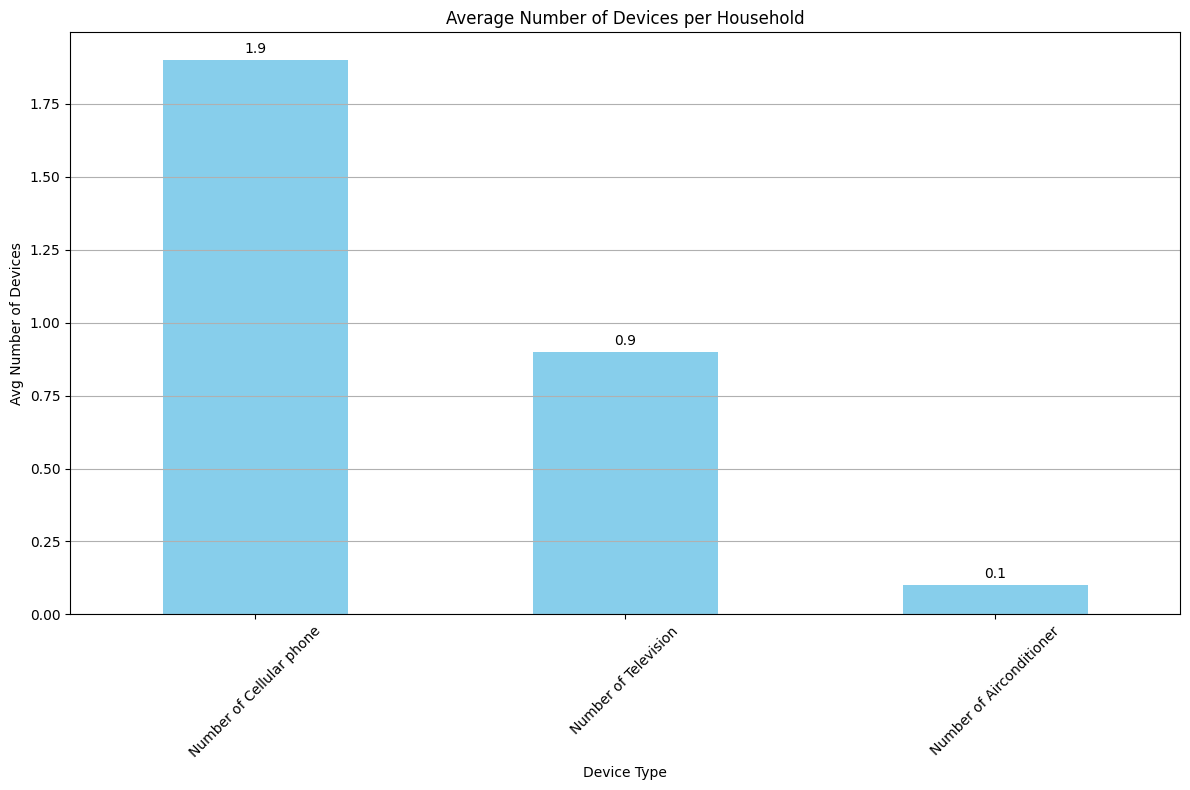

In [76]:
device_columns = ['Number of Television', 'Number of Cellular phone', 'Number of Airconditioner']
avg_devices = fam[device_columns].mean().sort_values(ascending=False).round(1)

ax = avg_devices.plot(kind='bar', color='skyblue')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Number of Devices per Household')
plt.xlabel('Device Type')
plt.ylabel('Avg Number of Devices')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

<h1>Insight 17</h1>
<ul>
    <li>
        Households led by individuals with higher levels of education tend to spend less on tobacco and alcoholic beverages. This could suggest healthier lifestyle choices or greater awareness of the risks associated with smoking and drinking. 
    </li>
    <li>
        While alcohol spending also decreases with higher education levels, the decline is less pronounced compared to tobacco. This suggests that alcohol consumption might be influenced by factors beyond education alone. 
    </li>
</ul>

In [66]:
# Group by education level and calculate average spending
edu_spending = fam.groupby('Household Head Highest Grade Completed')[['Tobacco Expenditure', 'Alcoholic Beverages Expenditure']].mean().round(2).sort_values(by="Tobacco Expenditure", ascending=False).reset_index()
edu_spending

,Household Head Highest Grade Completed,Tobacco Expenditure,Alcoholic Beverages Expenditure
0,Law Programs,2950.97,1954.49
1,Third Year High School,2696.14,1180.76
2,Second Year High School,2671.29,1117.71
3,Mathematics and Statistics Programs,2478.18,2097.73
4,Security Services Programs,2468.73,1452.40
5,Elementary Graduate,2467.98,1063.84
6,High School Graduate,2464.89,1181.72
7,Grade 2,2389.16,919.91
8,Grade 3,2389.13,974.90
9,Arts Programs,2345.48,1297.48


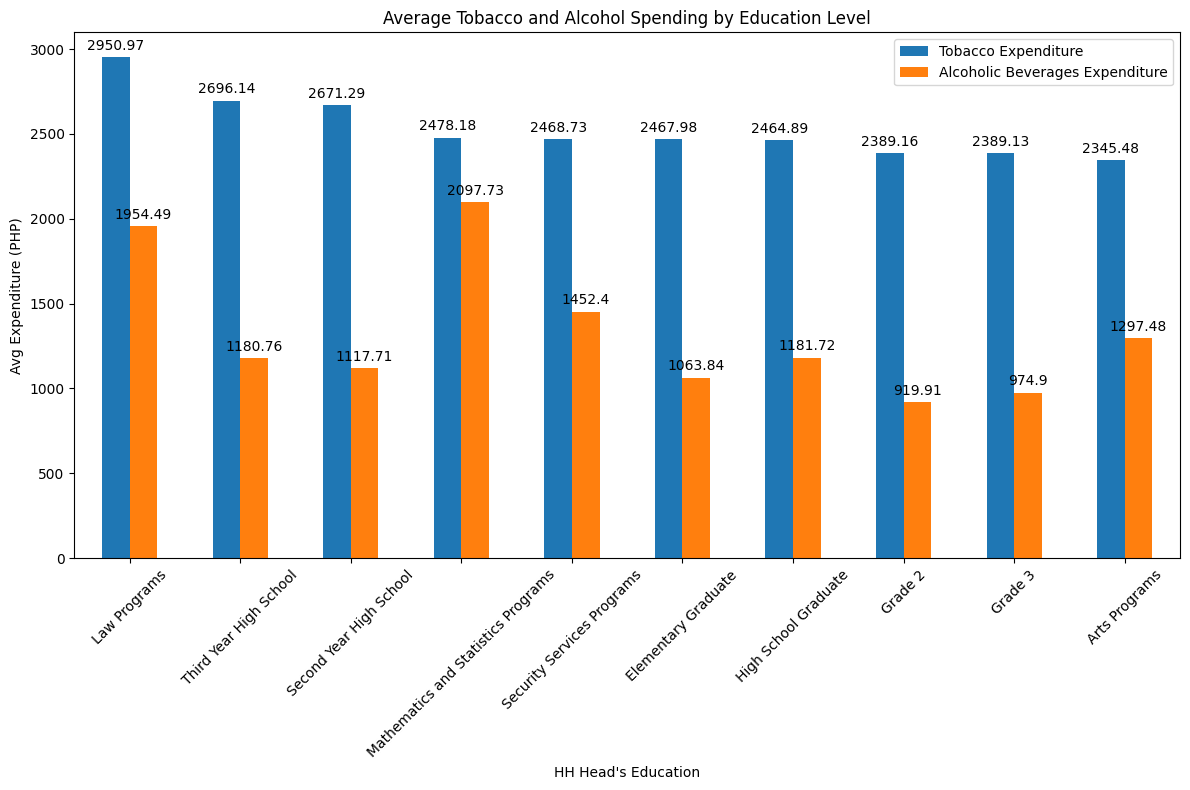

In [78]:
ax = edu_spending.head(10).set_index('Household Head Highest Grade Completed').plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Tobacco and Alcohol Spending by Education Level')
plt.xlabel("HH Head's Education")
plt.ylabel('Avg Expenditure (PHP)')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

<h1>Insight 18</h1>
<ul>
    <li>
        Households in urbanized regions, such as the National Capital Region (NCR), spend significantly more on both meat and fish compared to less developed or rural regions. This highlights disparities in income levels, dietary preferences, and access to diverse food sources across different parts of the country. 
    </li>
</ul>

In [85]:
region_meat_fish = fam.groupby('Region')[['Meat Expenditure', 'Total Fish and  marine products Expenditure']].mean().round()

# Sort by total spending for better readability
region_meat_fish['Total'] = region_meat_fish.sum(axis=1)
region_meat_fish = region_meat_fish.sort_values(by='Total', ascending=False).drop(columns='Total')

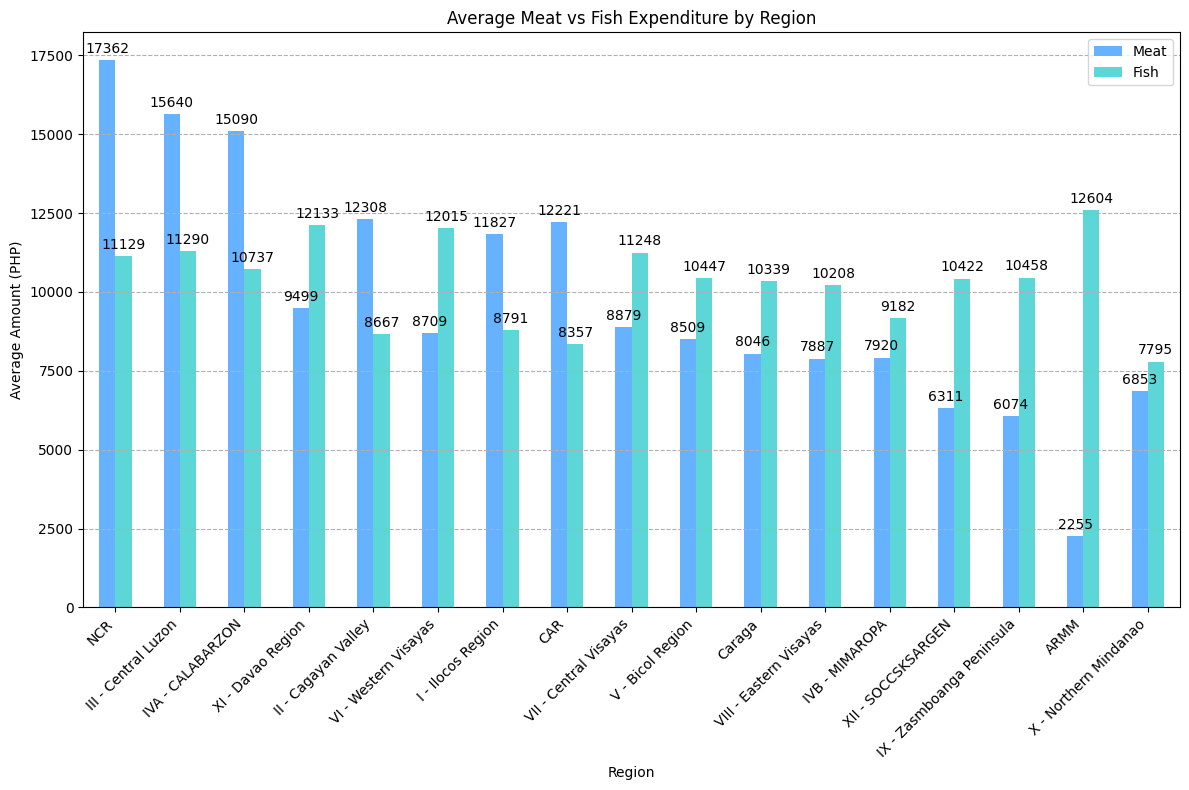

In [86]:
ax = region_meat_fish.plot(kind='bar', color=['#66B2FF', '#5CD6D6'])

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Average Meat vs Fish Expenditure by Region')
plt.ylabel('Average Amount (PHP)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--')
plt.legend(['Meat', 'Fish'])
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

<h1>
    Insight 19
</h1>
<ul>
    <li>
        Urbanized regions, such as NCR (National Capital Region) and Central Luzon , have significantly higher average numbers of employed family members compared to rural or less developed areas. This reflects better job opportunities and economic activity in urban centers. 
    </li>
    <li>
        Rural or less developed regions, such as CAR (Cordillera Administrative Region) and ARMM (Autonomous Region in Muslim Mindanao) , have considerably lower average employment rates. This highlights disparities in job availability and economic development. 
    </li>
</ul>

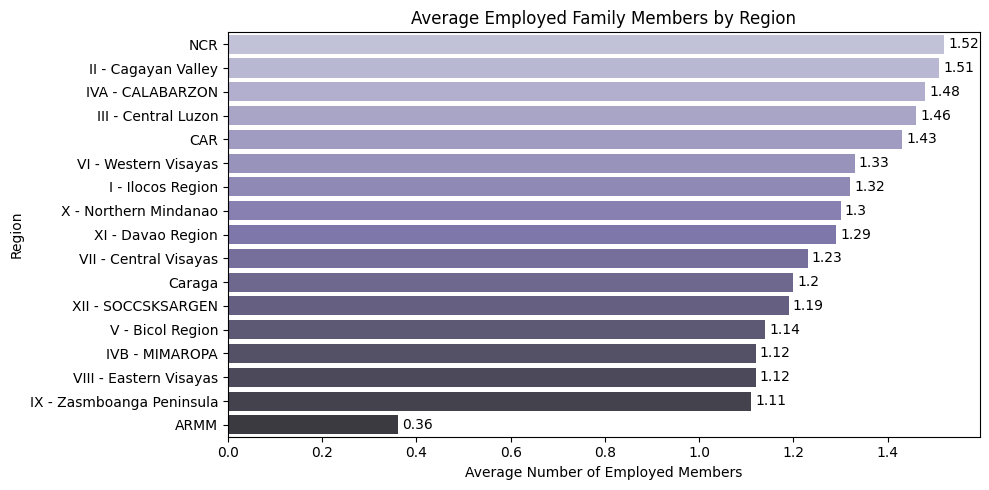

In [103]:
employed_by_region = fam.groupby("Region")["Total number of family members employed"].mean().round(2).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=employed_by_region.values, y=employed_by_region.index, palette="Purples_d")

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title("Average Employed Family Members by Region")
plt.xlabel("Average Number of Employed Members")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h1>Insight 20</h1>
<ul>
    <li>
        Urbanized regions, such as NCR (National Capital Region) and Central Luzon , have significantly larger average house floor areas compared to rural or less developed areas. This reflects higher income levels and better access to resources for constructing bigger homes.
    </li>
    <li>
        Rural or less developed regions, such as SOCCSKSARGEN and Davao Region , have considerably smaller average house floor areas. This highlights disparities in economic development and housing quality.
    </li>
</ul>

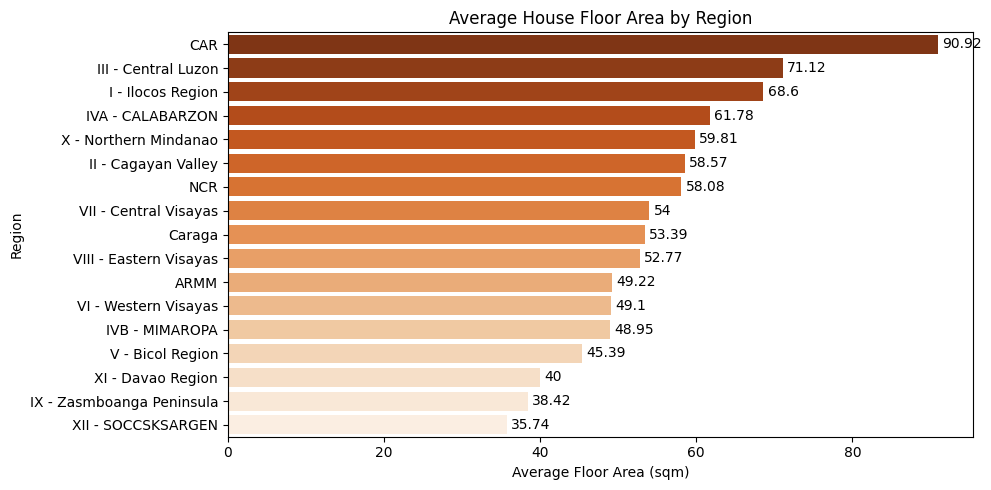

In [100]:
# Average house size by region
floor_area_by_region = fam.groupby("Region")["House Floor Area"].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=floor_area_by_region.values, y=floor_area_by_region.index, palette="Oranges_r")

for x in ax.containers:
    ax.bar_label(x, padding=3)
  
plt.title("Average House Floor Area by Region")
plt.xlabel("Average Floor Area (sqm)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()